# Автоматическая обработка текстов
## Домашнее задание 2 [10 баллов]
В этом домашнем задании вам потребуется
* проанализировать коллекцию текстов (новостных сообщений) и построить ее тематическую модель.

# Тематическое моделирование.

### Загружаем данные
Для тех, у кого windows (скачайте и распакуйте вручную), выполнять следующие строчки нет необходимости.

In [1]:
!wget https://github.com/yutkin/lenta.ru-news-dataset/raw/master/data/lenta_data.tar.gz.aa

--2018-05-05 10:04:58--  https://github.com/yutkin/lenta.ru-news-dataset/raw/master/data/lenta_data.tar.gz.aa
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yutkin/lenta.ru-news-dataset/master/data/lenta_data.tar.gz.aa [following]
--2018-05-05 10:04:59--  https://raw.githubusercontent.com/yutkin/lenta.ru-news-dataset/master/data/lenta_data.tar.gz.aa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52428800 (50M) [application/octet-stream]
Saving to: <<lenta_data.tar.gz.aa>>

lenta_data.tar.gz.a 100%[===================>]  50.00M  5.21MB/s    in 13s     

2018-05-05 10:05:13 (3.77 MB/s) - <<lenta_data.tar.gz.aa>> sav

In [2]:
!tar -xvf lenta_data.tar.gz.aa

x lenta_data.csv: (Empty error message)
tar: Error exit delayed from previous errors.


### Подготовка и первичный анализ данных [3 балла]

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_full = pd.read_csv("lenta_data.csv", error_bad_lines=False, encoding="utf-8", engine="python")

Заменим строковые названия тем новостей (категории) на порядковые номера тем (перечисление):

In [4]:
topics = df_full.topic.factorize()[1]

In [5]:
df_full.topic = df_full.topic.factorize()[0]

In [6]:
df_full.head(10)

,tags,text,title,topic,url
0,Деловой климат,Заместитель председателя правительства Аркадий...,Правительство прокомментировало идею о запрете...,0,https://lenta.ru/news/2017/04/01/24hours/
1,События,Монреальская конвенция об унификации правил во...,Эксперт отвел год на окончательную ратификацию...,1,https://lenta.ru/news/2017/03/31/motrealwork/
2,Общество,Сотни байкеров в столице Аргентины Буэнос-Айре...,Аргентинские байкеры устроили акцию протеста п...,2,https://lenta.ru/news/2017/03/30/bikers/
3,Политика,Прямая линия с президентом России Владимиром П...,Прямая линия с Путиным пройдет позже обычного,3,https://lenta.ru/news/2017/03/30/straightahead/
4,Футбол,Нападающий английского «Сандерленда» Данкан Уо...,Английский футболист спас трех человек на отды...,4,https://lenta.ru/news/2017/03/30/duncanwatmore/
5,Гаджеты,Президент США Дональд Трамп начал использовать...,Трамп перешел на iPhone,5,https://lenta.ru/news/2017/03/29/zvonilka/
6,Общество,"Стена, которая отделит США от Мексики, может н...",В Вашингтоне засомневались в возможности разде...,2,https://lenta.ru/news/2017/03/29/the_wall/
7,Происшествия,При пожаре в автосервисе на северо-востоке Мос...,При пожаре в московском автосервисе погиб человек,3,https://lenta.ru/news/2017/03/28/pozharvavtose...
8,Политика,Президент США Дональд Трамп примет участие в с...,Трамп поедет на саммит G20 в Гамбурге,2,https://lenta.ru/news/2017/03/28/trumpg20/
9,Рынки,Евро может ослабнуть после победы Марин Ле Пен...,Евро и доллару предсказали равенство в случае ...,6,https://lenta.ru/news/2017/03/27/eurousdequal/


In [7]:
df_full.count()

tags     635617
text     635617
title    635617
topic    635617
url      635617
dtype: int64

#### Посмотрим распределение тем в датасете

In [8]:
len(topics), topics

(23,
 Index(['Бизнес', 'Путешествия', 'Мир', 'Россия', 'Спорт', 'Наука и техника',
        'Финансы', 'Культпросвет ', 'Интернет и СМИ', 'Силовые структуры',
        'Ценности', 'Бывший СССР', 'Из жизни', 'Культура', 'Крым',
        '69-я параллель', 'Легпром', 'Библиотека', 'Недвижимость', 'ЧМ-2014',
        'МедНовости', 'Оружие', 'Сочи'],
       dtype='object'))

Сначала найдем количество статей по каждой категории:

In [9]:
counts = df_full.topic.value_counts()
dist = list()
for index, value in counts.items():
    dist.append((topics[index], value))
dist

[('Россия', 147863),
 ('Мир', 124749),
 ('Финансы', 72736),
 ('Спорт', 55395),
 ('Культура', 48264),
 ('Наука и техника', 48129),
 ('Бывший СССР', 47722),
 ('Интернет и СМИ', 38729),
 ('Из жизни', 23267),
 ('Силовые структуры', 13959),
 ('Бизнес', 6026),
 ('Путешествия', 4006),
 ('Ценности', 3816),
 ('69-я параллель', 567),
 ('Крым', 116),
 ('Легпром', 114),
 ('Культпросвет ', 85),
 ('Библиотека', 65),
 ('Недвижимость', 3),
 ('Оружие', 2),
 ('ЧМ-2014', 2),
 ('МедНовости', 1),
 ('Сочи', 1)]

Мы видим, что статьи распределены по категориям неравномерно, некоторые категории практически пустые.

Построим гистограмму тем (df_full.topic). Мы можем сдеать это с помощью функции hist:

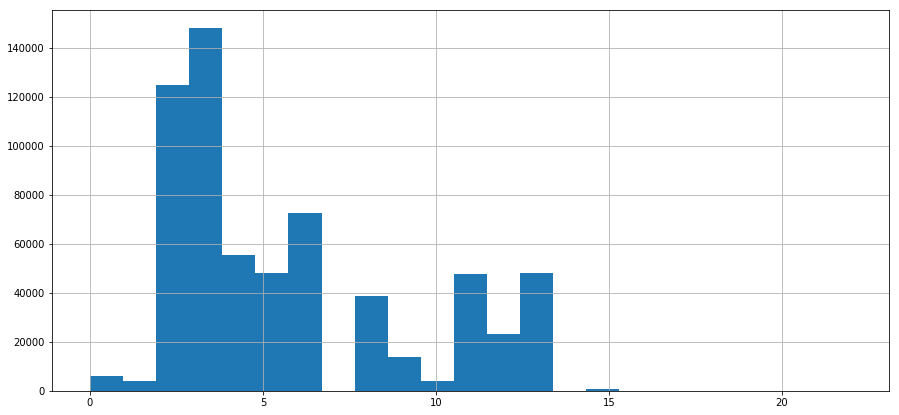

In [10]:
plt.figure(figsize=(15, 7))
df_full.topic.hist(bins=23)

Длят отображения распределения новостей по категориям также можно использовать обычную столбчатую диаграмму, построенную на результатах df_full.topic.value_counts():

<BarContainer object of 23 artists>

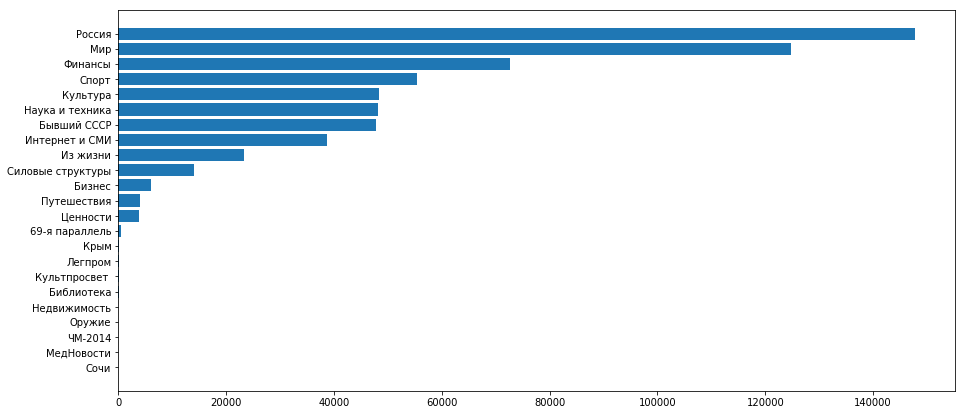

In [11]:
plt.figure(figsize=(15, 7))
plt.barh(*list(zip(*reversed(dist))))

Часть категорий, похоже, содержит недостаточно данных для обучения.

#### Сэмплирование

Для того, чтобы ускорить работу на имеющемся железе, сделаем выборку из исходных данных -- равное количество строк для каждого класса:

In [12]:
import numpy as np


def balanced_sample_maker(X, y, sample_size, random_seed=None):
    """ return a balanced data set by sampling all classes with sample_size 
        current version is developed on assumption that the positive
        class is the minority.

    Parameters:
    ===========
    X: {numpy.ndarrray}
    y: {numpy.ndarray}
    """
    uniq_levels = np.unique(y)
    uniq_counts = {level: sum(y == level) for level in uniq_levels}

    if not random_seed is None:
        np.random.seed(random_seed)

    # find observation index of each class levels
    groupby_levels = {}
    for ii, level in enumerate(uniq_levels):
        obs_idx = [idx for idx, val in enumerate(y) if val == level]
        groupby_levels[level] = obs_idx
    # oversampling on observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in groupby_levels.items():
        over_sample_idx = np.random.choice(gb_idx, size=min(sample_size, len(groupby_levels[gb_level])), replace=True).tolist()
        balanced_copy_idx+=over_sample_idx
    np.random.shuffle(balanced_copy_idx)

    return X[balanced_copy_idx], y[balanced_copy_idx], balanced_copy_idx

In [13]:
X, y, balanced_copy_idx = balanced_sample_maker(np.array(df_full.text), df_full.topic, 500)

In [14]:
df = df_full.iloc[balanced_copy_idx]

In [15]:
len(df), len(df.topic.unique())

(7389, 23)

In [16]:
df.head()

,tags,text,title,topic,url
144449,Звери,Студент-дизайнер из Великобритании Джек Девани...,Британский студент предложил покупателям пенал...,12,https://lenta.ru/news/2017/03/01/deadrat/
254111,Явления,Американский предприниматель Марк Фарезе (Mark...,Коллекцию кроссовок оценили в миллион долларов,10,https://lenta.ru/news/2016/10/26/farese/
5100,Следствие и суд,Суд в Санкт-Петербурге приговорил сотрудника у...,Застреливший петербуржца сыщик получил меньше ...,9,https://lenta.ru/news/2016/12/08/prigovorpolice/
499858,Все,Японское космическое агентство (JAXA) представ...,Япония представила новый космический грузовик,5,https://lenta.ru/news/2008/12/26/htv/
398004,Компании,Лондонский суд округа Вестминстер отказал в уд...,Лондонский суд отказался экстрадировать бывшег...,0,https://lenta.ru/news/2017/01/02/toliattiazot_...


Постпроим гистограмму тем (df.topic) -- важно указать правильное количество корзин, равное количеству категорий.

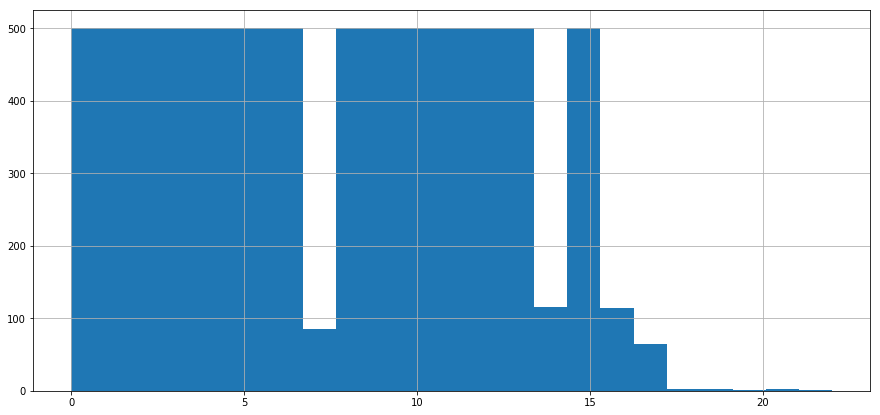

In [17]:
plt.figure(figsize=(15, 7))
df.topic.hist(bins=23)

Видно, что у нас действительно не более 500 строк в каждой категории, но некоторые категории содержат недостаточно данных -- их было недостаточно в исходных данных.

Также можем посмотреть на количество документов в каждой категории с помощью df.topic.value_counts(): 

In [18]:
df_counts = df.topic.value_counts()
df_dist = list()
for index, value in df_counts.iteritems():
    df_dist.append((topics[index], value))
df_dist

[('Бизнес', 500),
 ('Из жизни', 500),
 ('Интернет и СМИ', 500),
 ('Путешествия', 500),
 ('Наука и техника', 500),
 ('Силовые структуры', 500),
 ('Культура', 500),
 ('69-я параллель', 500),
 ('Мир', 500),
 ('Финансы', 500),
 ('Ценности', 500),
 ('Спорт', 500),
 ('Россия', 500),
 ('Бывший СССР', 500),
 ('Крым', 116),
 ('Легпром', 114),
 ('Культпросвет ', 85),
 ('Библиотека', 65),
 ('Недвижимость', 3),
 ('ЧМ-2014', 2),
 ('Оружие', 2),
 ('МедНовости', 1),
 ('Сочи', 1)]

Удалим из выборки категории, содержащие менее 500 статей:

In [20]:
df = df[df['topic'].isin(df_counts.index[df_counts == 500])]

In [21]:
len(df), len(np.unique(df.topic))

(7000, 14)

Таким образом мы оставили 14 категорий по 500 документов в каждой, итого 7000 документов

#### Токенизация

Оставим только русские слова и приведем все слова к нижнему регистру:

In [22]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[3]

'японское космическое агентство представило публике новый грузовой космический корабль сообщает итар тасс на его создание у агентства ушло более миллионов долларов корабль имеет метров в длину метра в ширину а его вес составляет более тонн грузовик предполагается использовать для доставки полезных грузов на международную космическую станцию мкс первые полеты нового аппарата запланированы на год в настоящее время технологией производства автоматических грузовых кораблей располагает европейское космическое агентство и роскосмос предполагает использовать для доставки грузов частные компании с которыми оно заключило контракт на миллиарда долларов в россии это грузовики серии прогресс а в европе жюль верн первый полет которого состоялся в году от своих конкурентов японский аппарат отличает простота конструкции у нет системы обеспечивающей сближение и стыковку предполагается что аппарат будет просто подходить достаточно близко к станции после чего манипулятор расположенный на мкс будет подтя

#### Удалияем из текста лишние символы/стоп-слова

In [23]:
from nltk.corpus import stopwords

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

def remove_stopwords(text, stopwords=mystopwords):
    try:
        return " ".join([token for token in text.split() if token not in stopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)

Частота слов:

In [24]:
from nltk import FreqDist

def top_words(top):
    fd = FreqDist()
    for item in df.text:
        fd.update(item.split())
    return fd.most_common(top)

top_words(20)

[('года', 6133),
 ('году', 3749),
 ('сообщает', 3639),
 ('россии', 3503),
 ('время', 2505),
 ('компании', 2072),
 ('словам', 1981),
 ('заявил', 1882),
 ('долларов', 1838),
 ('рублей', 1785),
 ('процентов', 1672),
 ('ранее', 1662),
 ('который', 1647),
 ('тысяч', 1637),
 ('однако', 1615),
 ('которые', 1573),
 ('сша', 1569),
 ('около', 1478),
 ('компания', 1432),
 ('будут', 1355)]

#### Лемматизация

In [25]:
%%time 
from pymystem3 import Mystem

mystem = Mystem()

def lemmatize(text, mystem=mystem):
    try:
        return "".join(mystem.lemmatize(text)).strip()
    except:
        return ""
    
df.text = df.text.apply(lemmatize)
top_words(20)

CPU times: user 5.26 s, sys: 279 ms, total: 5.54 s
Wall time: 50 s


In [26]:
top_words(20)

[('год', 12933),
 ('который', 7750),
 ('сообщать', 5605),
 ('россия', 4462),
 ('компания', 4398),
 ('время', 3070),
 ('российский', 3047),
 ('свой', 3045),
 ('процент', 3009),
 ('становиться', 2933),
 ('заявлять', 2910),
 ('новый', 2663),
 ('человек', 2431),
 ('тысяча', 2413),
 ('слово', 2373),
 ('первый', 2355),
 ('страна', 2331),
 ('отмечать', 2211),
 ('доллар', 2092),
 ('один', 2080)]

Дополнительная очистка от стоп-слов после лематизации:

In [27]:
mystoplemmas = ['год', 'который','сообщать', 'свой', 'становиться', 'заявлять', 'тысяча', 'миллион', 'миллиард' ]
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  
top_words(20)

[('россия', 4462),
 ('компания', 4398),
 ('время', 3070),
 ('российский', 3047),
 ('процент', 3009),
 ('новый', 2663),
 ('человек', 2431),
 ('слово', 2373),
 ('первый', 2355),
 ('страна', 2331),
 ('отмечать', 2211),
 ('доллар', 2092),
 ('один', 2080),
 ('рубль', 2038),
 ('получать', 2030),
 ('президент', 1988),
 ('составлять', 1748),
 ('ранее', 1662),
 ('однако', 1615),
 ('работа', 1606)]

#### Облако слов

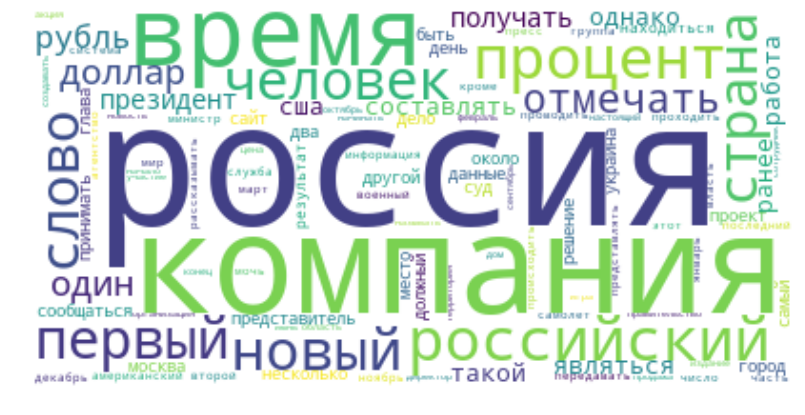

In [28]:
from wordcloud import *

word_freq = [i for i in top_words(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(15, 7))
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

На данном этапе будем считать, что остались только информативные слова.

### Визуализация данных [1 балл]
Используйте T-SNE, чтобы посмотреть на данные в двумерном виде.

In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer


Перед тем, как применить T-SNE, нужно снизить размерность. Используем сингулярное разложение для того, чтобы снизить размерность до 5.

In [30]:
%%time
vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)


CPU times: user 1.77 s, sys: 511 ms, total: 2.28 s
Wall time: 3.35 s


In [34]:
X_reduced

array([[ 0.09735009, -0.00577158,  0.03253238, -0.00813424, -0.01245142],
       [ 0.08489459,  0.01947974,  0.12363896, -0.02296399,  0.02997076],
       [ 0.12884968, -0.11812208, -0.05038985, -0.03791911, -0.01194213],
       ...,
       [ 0.05064869, -0.02871138,  0.05246188,  0.0319578 ,  0.00388146],
       [ 0.06776652, -0.0355684 ,  0.05392312,  0.01737644,  0.01749376],
       [ 0.13494776, -0.06502023, -0.07121451, -0.03301109, -0.0115153 ]])

Важным параметром T-SNE является perplexity. Типичные значения лежат в диапазоне от 5 до 50. Подробнее о выборе значения perplexity можно почитать тут https://distill.pub/2016/misread-tsne/
Примем значение perplexity=30, размерность n_components=2, результаты представлены ниже.

In [154]:
%%time
X_embedded = TSNE(n_components=2, perplexity=30, verbose=0).fit_transform(X_reduced)

CPU times: user 3min 43s, sys: 22.2 s, total: 4min 6s
Wall time: 4min 16s


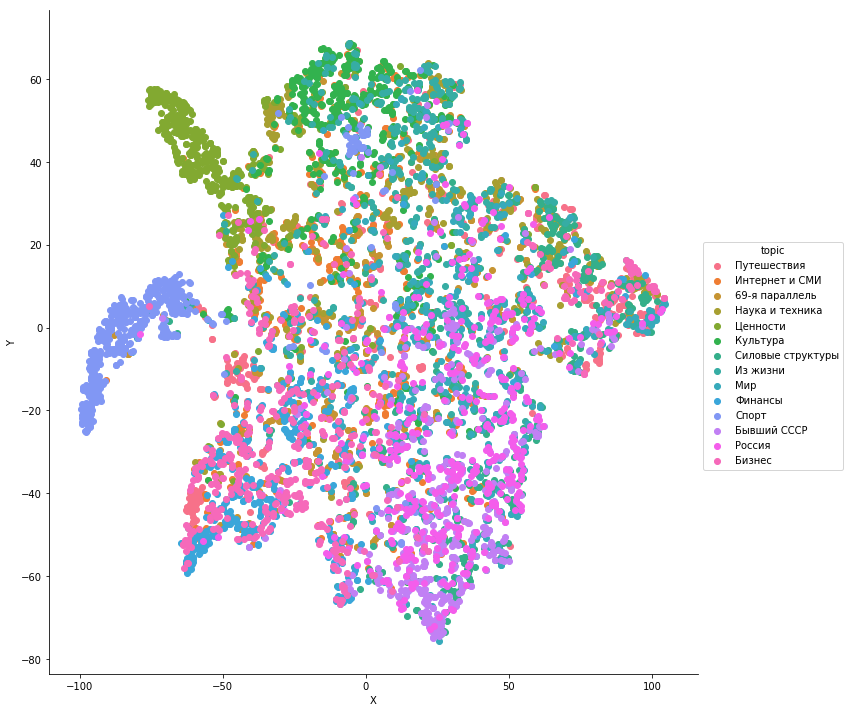

In [155]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.topic.apply(lambda x: topics[x])})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

На графике видно, что некоторые рубрики, такие как Спорт, Наука и техника, Культура и др. образуют отчетливые кластеры. Статьи по другим тематикам не разделены так явно.

<your answer here>

### Создайте корпус и обучите тематическую модель [2 балла]
Выделите термины из текста и создайте корпус для gensim или другой библиотеки.

In [39]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

In [42]:
from gensim.corpora import *
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [55]:
print(dictionary)

Dictionary(41773 unique tokens: ['белок', 'бизнес', 'борьба', 'великобритания', 'вредитель']...)


Обучим модель Latent Dirichlet Allocation, LDA
Укажем, что нам нужно 14 тематик.

In [57]:
%%time
from gensim.models import ldamodel
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=14,
                        alpha='auto', eta='auto', iterations = 20, passes = 10)

CPU times: user 53.7 s, sys: 224 ms, total: 53.9 s
Wall time: 54.1 s


### Интерпретация результатов [2 балла]
Простейший способ посмотреть на полученные тематики -- метод show_topics()

In [63]:
lda.show_topics()

[(6,
  '0.010*"выборы" + 0.010*"президент" + 0.009*"партия" + 0.009*"россия" + 0.007*"область" + 0.006*"регион" + 0.005*"процент" + 0.005*"новый" + 0.005*"депутат" + 0.005*"автомобиль"'),
 (1,
  '0.015*"компания" + 0.014*"бренд" + 0.011*"коллекция" + 0.010*"модель" + 0.009*"представлять" + 0.009*"одежда" + 0.007*"новый" + 0.006*"дом" + 0.006*"выпускать" + 0.006*"основывать"'),
 (0,
  '0.007*"музей" + 0.005*"город" + 0.004*"памятник" + 0.004*"школа" + 0.004*"время" + 0.004*"художник" + 0.004*"ребенок" + 0.003*"день" + 0.003*"один" + 0.003*"работа"'),
 (9,
  '0.012*"матч" + 0.010*"команда" + 0.009*"сборная" + 0.009*"клуб" + 0.008*"чемпионат" + 0.008*"россия" + 0.007*"мир" + 0.006*"игра" + 0.006*"первый" + 0.006*"российский"'),
 (3,
  '0.011*"сайт" + 0.011*"пользователь" + 0.008*"интернет" + 0.007*"сервис" + 0.007*"сеть" + 0.005*"компания" + 0.005*"самый" + 0.004*"человек" + 0.004*"место" + 0.004*"время"'),
 (11,
  '0.009*"самолет" + 0.007*"новый" + 0.007*"проект" + 0.007*"военный" + 0.00

Даже в таком простом представлении можно попробовать угадать темы:
* тема 6 связана с выборами
* тема 1 и 8 с экономикой
* тема 0 -- культура
* тема 9 -- спорт

pyLDAvis позволяет построить интерактивную визуализацию тематик:

In [95]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/Users/stsivin/projects/nlp-hse/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


Видно, что тематики получились осмысленными. 
Обособлено (далеко от других но рядом с друг другом) расположены тематики 6 и 4, которые посвящены происшествиям и правовым вопросам соответственно.
Тематика 11 также обособлена от других и содержит термины характерные для индустрии моды
Группа тематик 5, 12, 7, 10, 14 находятся рядом. 7 -- спорт, 5 -- кино, 10 -- наука и техника, 14 -- культтура, 12 -- Интернет
Тематики 1, 3, 8, 13 имеют близкий словарь. 8 -- Путешествия, 13 -- выборы. Еще несколько тематик про макроэкономику и политику.
Тематика 2 скорее всего про СНГ.

Интересно, что числовые номера тем **не совпадают** с номерами show_topics

### Оцените качество работы модели [1 балл]
Вычислите перплексию для модели.

Вычисление перплексии происходит автоматически в процессе обучения модели. Оценка unsupervised моделей, к которым относится модель LDA сложнее, чем для моделей с учителем.  Подробнее об оценке тематической модели написано тут: https://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html
         

In [70]:
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore


In [73]:
%time 
lda2 = ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=4)

INFO : using symmetric alpha at 0.1
INFO : using symmetric eta at 0.1
INFO : using serial LDA version on this node
INFO : running online (multi-pass) LDA training, 10 topics, 4 passes over the supplied corpus of 7000 documents, updating model once every 2000 documents, evaluating perplexity every 7000 documents, iterating 50x with a convergence threshold of 0.001000
INFO : PROGRESS: pass 0, at document #2000/7000


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


INFO : merging changes from 2000 documents into a model of 7000 documents
INFO : topic #4 (0.100): 0.006*"россия" + 0.005*"российский" + 0.004*"время" + 0.004*"процент" + 0.004*"новый" + 0.004*"компания" + 0.003*"первый" + 0.003*"страна" + 0.003*"человек" + 0.003*"москва"
INFO : topic #8 (0.100): 0.005*"россия" + 0.004*"страна" + 0.003*"время" + 0.003*"рубль" + 0.003*"получать" + 0.003*"процент" + 0.003*"человек" + 0.002*"слово" + 0.002*"быть" + 0.002*"новый"
INFO : topic #5 (0.100): 0.006*"россия" + 0.005*"процент" + 0.005*"компания" + 0.004*"отмечать" + 0.004*"российский" + 0.004*"время" + 0.003*"работа" + 0.003*"страна" + 0.003*"доллар" + 0.003*"составлять"
INFO : topic #2 (0.100): 0.005*"новый" + 0.004*"россия" + 0.004*"получать" + 0.004*"самолет" + 0.004*"первый" + 0.004*"компания" + 0.004*"рубль" + 0.003*"человек" + 0.003*"один" + 0.003*"страна"
INFO : topic #7 (0.100): 0.005*"россия" + 0.004*"доллар" + 0.004*"компания" + 0.004*"украина" + 0.004*"российский" + 0.003*"процент" + 0

INFO : PROGRESS: pass 1, at document #7000/7000
INFO : merging changes from 1000 documents into a model of 7000 documents
INFO : topic #1 (0.100): 0.016*"процент" + 0.010*"компания" + 0.008*"рубль" + 0.005*"составлять" + 0.005*"доллар" + 0.005*"человек" + 0.005*"цена" + 0.005*"россия" + 0.004*"данные" + 0.004*"страна"
INFO : topic #6 (0.100): 0.010*"президент" + 0.006*"россия" + 0.006*"выборы" + 0.005*"пост" + 0.005*"партия" + 0.004*"глава" + 0.004*"новый" + 0.004*"совет" + 0.004*"должность" + 0.003*"сша"
INFO : topic #7 (0.100): 0.007*"украина" + 0.006*"суд" + 0.006*"дело" + 0.005*"россия" + 0.005*"страна" + 0.005*"человек" + 0.004*"президент" + 0.004*"власть" + 0.003*"слово" + 0.003*"российский"
INFO : topic #5 (0.100): 0.008*"ученый" + 0.005*"работа" + 0.004*"исследование" + 0.004*"процент" + 0.004*"отмечать" + 0.004*"новый" + 0.004*"время" + 0.003*"человек" + 0.003*"такой" + 0.003*"слово"
INFO : topic #3 (0.100): 0.010*"компания" + 0.008*"бренд" + 0.007*"коллекция" + 0.007*"модель"

INFO : topic diff=0.198297, rho=0.365148
INFO : PROGRESS: pass 3, at document #6000/7000
INFO : merging changes from 2000 documents into a model of 7000 documents
INFO : topic #8 (0.100): 0.008*"мужчина" + 0.007*"ребенок" + 0.007*"летний" + 0.007*"полиция" + 0.007*"человек" + 0.006*"происходить" + 0.005*"животное" + 0.005*"женщина" + 0.005*"обнаруживать" + 0.005*"дом"
INFO : topic #9 (0.100): 0.013*"россия" + 0.011*"компания" + 0.007*"российский" + 0.007*"рубль" + 0.005*"проект" + 0.005*"процент" + 0.004*"правительство" + 0.004*"отмечать" + 0.004*"газ" + 0.004*"новый"
INFO : topic #6 (0.100): 0.013*"президент" + 0.008*"выборы" + 0.007*"партия" + 0.006*"россия" + 0.006*"пост" + 0.005*"глава" + 0.004*"совет" + 0.004*"премия" + 0.004*"владимир" + 0.004*"директор"
INFO : topic #0 (0.100): 0.011*"матч" + 0.009*"команда" + 0.009*"клуб" + 0.008*"акция" + 0.008*"россия" + 0.007*"компания" + 0.007*"сборная" + 0.007*"чемпионат" + 0.007*"счет" + 0.006*"российский"
INFO : topic #2 (0.100): 0.013*"

В ходе обучения перплексия снизилась с 619.0 до 369.0

### Применение модели [1 балл]
Выберите несколько текстов из коллекции и найдите распределение тем для них.

In [80]:
df_unseen = df_full[1000:1010]
df_unseen

,tags,text,title,topic,url
1000,Следствие и суд,Мосгорсуд оставил под стражей украинского режи...,Обвиняемого в подготовке теракта режиссера Сен...,9,https://lenta.ru/news/2014/10/24/sentsov/
1001,Футбол,"Фанаты турецкого «Галатасарая», вооруженные но...",Фанаты «Галатасарая» с ножами напали на болель...,4,https://lenta.ru/news/2014/10/22/galatasaray/
1002,Катастрофы,Водитель снегоуборочной машины Владимир Мартын...,Задержан водитель столкнувшегося с самолетом с...,3,https://lenta.ru/news/2014/10/21/detention/
1003,Госэкономика,ФГУП «Почта России» разработала пилотный проек...,«Почта России» решила доставлять официальные п...,6,https://lenta.ru/news/2014/10/19/post/
1004,Следствие и суд,Люблинский суд Москвы арестовал на пять суток ...,Последователя Паркмена арестовали на пять суток,9,https://lenta.ru/news/2014/10/20/prison/
1005,Рынки,Банк России вновь сдвинул границы валютного ко...,ЦБ сдвинул границы валютного коридора еще на 3...,6,https://lenta.ru/news/2014/10/17/corridor/
1006,Люди,Американский певец Стиви Уандер и его невеста ...,64-летний Стиви Уандер станет отцом тройни,12,https://lenta.ru/news/2014/10/16/wonder/
1007,Все,Мобильная платежная система Apple Pay заработа...,Мобильная платежная система Apple Pay начнет р...,5,https://lenta.ru/news/2014/10/16/applepay/
1008,Общество,Сотрудники пермского ЗАГСа зарегистрировали но...,В Перми родился Люцифер Константинович,3,https://lenta.ru/news/2014/10/15/lucifer/
1009,Футбол,30-летний полузащитник «Барселоны» и сборной И...,Полузащитник «Барселоны» стал лучшим возрастны...,4,https://lenta.ru/news/2014/10/14/barcelona/


In [82]:
def tokenize(text):
    return remove_stoplemmas(lemmatize(remove_stopwords(text))).split()

In [83]:
df_unseen.text.apply(tokenize)

1000    [мосгорсуд, оставлять, страж, украинский, режи...
1001    [фанат, турецкий, «галатасарай»,, вооруженный,...
1002    [водитель, снегоуборочный, машина, владимир, м...
1003    [фгуп, «почта, россия», разрабатывать, пилотны...
1004    [люблинский, суд, москва, арестовывать, пять, ...
1005    [банк, россия, вновь, сдвигать, граница, валют...
1006    [американский, певец, стиви, уандер, невеста, ...
1007    [мобильный, платежный, система, Apple, Pay, за...
1008    [сотрудник, пермский, загс, зарегистрировать, ...
1009    [30-летний, полузащитник, «барселона», сборная...
Name: text, dtype: object

Преобразуем в вектора bag of words (BOW):

In [88]:
bow_vectors = [dictionary.doc2bow(tokenize(df_unseen.text.iloc[i])) for i in range(len(df_unseen))]

Преобразуем в пространство LDA:

In [89]:
lda_vectors = [lda[bow_vector] for bow_vector in bow_vectors]

In [92]:
lda_vectors[0]

[(0, 0.07991812),
 (2, 0.34264725),
 (4, 0.01170979),
 (5, 0.35761),
 (10, 0.13466302),
 (12, 0.03180787),
 (13, 0.037773546)]

Отобразим наиболее вероятную тему для данных 10 документов:

In [101]:
for i, vector in enumerate(lda_vectors):
    print("{}) {}...".format(i, df_unseen.text.iloc[i][:100]))
    topic, weight = sorted(vector, key=lambda item: item[1], reverse=True)[0]
    print("\t{} {}".format(topic, weight))

0) Мосгорсуд оставил под стражей украинского режиссера Олега Сенцова, обвиняемого в подготовке терактов...
	5 0.35760998725891113
1) Фанаты турецкого «Галатасарая», вооруженные ножами, атаковали в Стамбуле болельщиков дортмундской «Б...
	9 0.5303796529769897
2) Водитель снегоуборочной машины Владимир Мартыненков, с которой в аэропорту Внуково столкнулся самоле...
	2 0.3557349145412445
3) ФГУП «Почта России» разработала пилотный проект, в рамках которого граждане смогут получать заказные...
	8 0.6009935140609741
4) Люблинский суд Москвы арестовал на пять суток водителя Дмитрия Афанасьева, который на прошлой неделе...
	10 0.42144662141799927
5) Банк России вновь сдвинул границы валютного коридора, установив их на уровне 37,25-46,25 рубля за би...
	7 0.6831093430519104
6) Американский певец Стиви Уандер и его невеста модель Томика Робин Брэйси станут родителями тройни, с...
	12 0.6064665913581848
7) Мобильная платежная система Apple Pay заработает в США с 20 октября. Об этом на презентаци

Видно, что документы (1) и (9) относятся к одной тематике, которую можно интерпретировать как Спортивные новости:

In [103]:
lda.show_topic(9)

[('матч', 0.011626329),
 ('команда', 0.010278494),
 ('сборная', 0.008923792),
 ('клуб', 0.008781969),
 ('чемпионат', 0.008021256),
 ('россия', 0.007774437),
 ('мир', 0.0067743794),
 ('игра', 0.0055634575),
 ('первый', 0.0055555925),
 ('российский', 0.005530021)]

## Дополнительное задание * [5 баллов]
Проведите анализ зависимости качества от терминов, которые используются в модели

In [ ]:
<your code here>

## Сдача домашнего задания

Дедлайн сдачи домашнего задания:  конец курса. 

Результаты домашнего задания должны быть оформлены в виде отчета в jupyter notebook.
Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание минимума необходимой теории и/или описание используемых инструментов 
* Подробный пошаговый рассказ о проделанной работе
* **Аккуратно** оформленные результаты
* Подробные и внятные ответы на все заданные вопросы 
* Внятные выводы – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.


Сдача отчетов осуществляется по email: login-const@mail.ru, заголовок письма – NLP-HSE-HW2-ИмяФамилия. 
